# Mini-proyecto haciendo uso de decisión para la detección de deficiencia cardíaca 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('processed.cleveland.data', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

In [4]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Missing data 

In [9]:
len(df.loc[(df.ca == '?') | (df.thal == '?')])

6

# Records who have missing data 

In [10]:
df.loc[(df.ca == '?') | (df.thal == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
df_no_missing = df.loc[(df.ca != '?') & (df.thal != '?')]
len(df_no_missing)

297

In [12]:
X = df_no_missing.drop('hd', axis= 1).copy()

In [13]:
y = df_no_missing.hd.copy()

# Para manejar los datos categóricos como es el caso de la columna *cp (chest pain)* debemos hacer uso del one-hot encoding. 


In [14]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [15]:
X_encoded = pd.get_dummies(X, columns= ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
y.unique() # como hay cuatro tipos de heart desease, del 1 al 4 son los diferentes niveles y del 0 es no heart desease 

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
y_not_zero_index = y > 0 # todos aquellos valores mayores a 0 los convertimos en 1 para hacer una clasificación binaria. 
print(y_not_zero_index)

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool


In [18]:
y[y_not_zero_index]= 1
y.head()
y.unique()

array([0, 1], dtype=int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , random_state = 42 ) 

In [20]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = clf_dt.predict(X_test)

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = NO HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = NO HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = NO HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = NO HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = NO HD'),
 Text(43.293103448275865, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = NO HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = NO HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = NO HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 0.

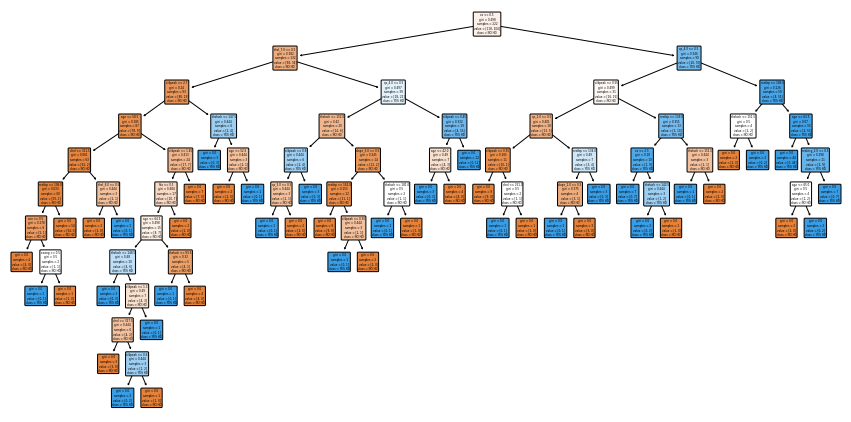

In [22]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled= True , rounded= True , class_names= ['NO HD', 'YES HD'], feature_names= X_encoded.columns)


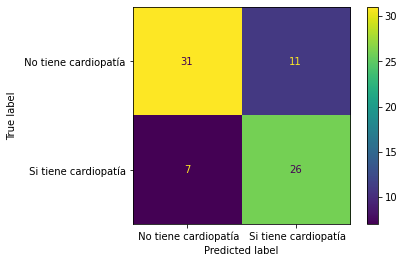

In [23]:
plot_confusion_matrix(clf_dt,X_test,y_test,display_labels = [' No tiene cardiopatía', ' Si tiene cardiopatía'])

In [24]:
y_pred = clf_dt.predict(X_test)
print(" el accuracy del modelo es:", metrics.accuracy_score (y_test,y_pred))

 el accuracy del modelo es: 0.76


# Cost complexity purning *visualize alpha* 



In [25]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # no se utiliza el máximo valor de alpha. 
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)


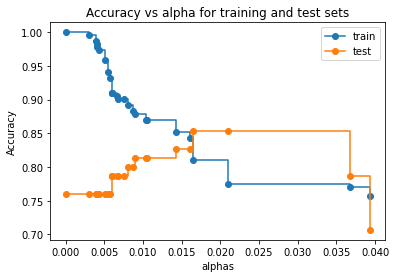

In [26]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]
fig , ax = plt.subplots()
ax.set_xlabel("alphas")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

# K fold  Cross validation 

## Se muestra que distintos conjuntos de entrenamiento y prueba con un ccp_alpha de 0.016 resultan en diferentes accuracies

<AxesSubplot:xlabel='tree'>

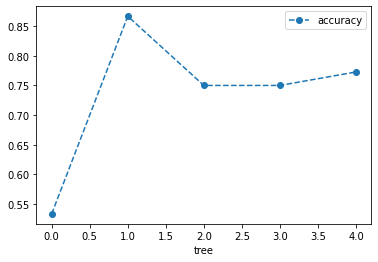

In [27]:
clf_dt = DecisionTreeClassifier(random_state= 42 , ccp_alpha = 0.016)
scores = cross_val_score (clf_dt, X_train, y_train, cv = 5)
df = pd.DataFrame(data={'tree':range(5),'accuracy': scores})
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [28]:
df.head()

,tree,accuracy
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


In [34]:
print(scores)

[0.53333333 0.73333333 0.65909091 0.65909091 0.75      ]


<AxesSubplot:xlabel='alpha'>

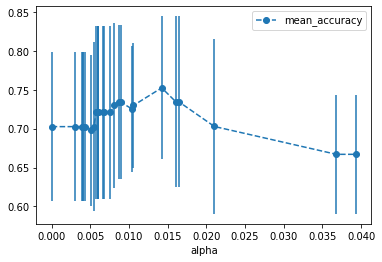

In [29]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train,y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha', 'mean_accuracy','std'])
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')


In [30]:
ideal_ccp_alpha = float(alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha']<0.015)]['alpha'])
ideal_ccp_alpha

0.014224751066856332

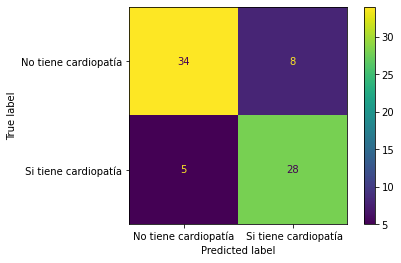

In [31]:
clf_pruned = DecisionTreeClassifier(random_state= 42, ccp_alpha = ideal_ccp_alpha)
clf_pruned.fit(X_train,y_train)
plot_confusion_matrix(clf_pruned,X_test,y_test, display_labels= ['No tiene cardiopatía' ,' Si tiene cardiopatía'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No tiene cardiopatía'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No tiene cardiopatía'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No tiene cardiopatía'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No tiene cardiopatía'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Tiene cardiopatía'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Tiene cardiopatía'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No tiene cardiopatía'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Tiene cardiopatía'),
 T

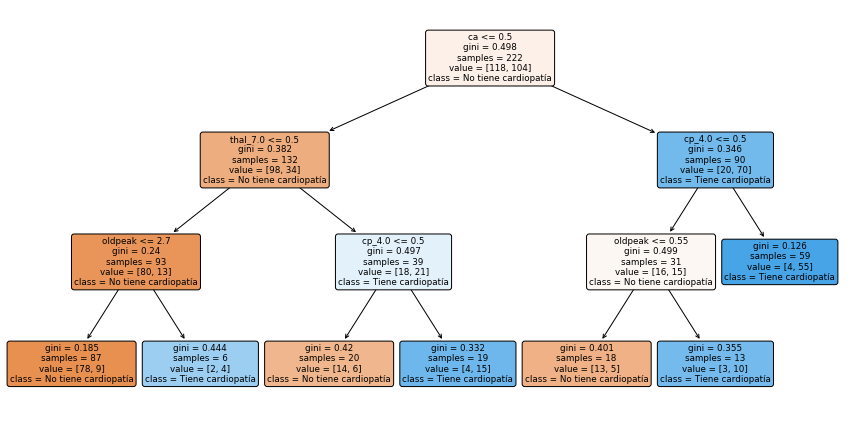

In [32]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_pruned,filled= True , rounded= True , class_names= ['No tiene cardiopatía', 'Tiene cardiopatía'], feature_names= X_encoded.columns)

In [33]:
y_pred = clf_pruned.predict(X_test)
print(" el accuracy del modelo es:", metrics.accuracy_score (y_test,y_pred))

 el accuracy del modelo es: 0.8266666666666667


# Explicación del árbol 

1. La raiz del árbol está decidida por el feature ca 

2. En el renglón donde dice value se refiere a que en dicho nodo tenemos *(118 personas que no tienen cardiopatía)* *(104 personas que tienen cardiopatía)*

3. Entre más oscuro sea el color del árbol mejor la clasificación. Esto se observa también dado a que el índice de gini es menor a media que avanzamos hacia las hojas del árbol. 

4. Este árbol de decisión funciona mucho mejor que el original. 